In [2]:
# Import our libraries
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import pandas as pd
import os,random
import IPython.display as ipd  # To play sound in the notebook

In [3]:
def spec_augment(spec: np.ndarray, num_mask=1, 
                 freq_masking_max_percentage=0.10, time_masking_max_percentage=0.15):

    spec = spec.copy()
    for i in range(num_mask):
        all_frames_num, all_freqs_num = spec.shape
        freq_percentage = random.uniform(0, freq_masking_max_percentage)
        
        num_freqs_to_mask = int(freq_percentage * all_freqs_num)
        f0 = np.random.uniform(low=0.0, high=all_freqs_num - num_freqs_to_mask)
        f0 = int(f0)
        spec[:, f0:f0 + num_freqs_to_mask] = 0.000

        time_percentage = random.uniform(0.0, time_masking_max_percentage)
        
        num_frames_to_mask = int(time_percentage * all_frames_num)
        t0 = np.random.uniform(low=0.0, high=all_frames_num - num_frames_to_mask)
        t0 = int(t0)
        spec[t0:t0 + num_frames_to_mask, :] = 0.000
    
    return spec

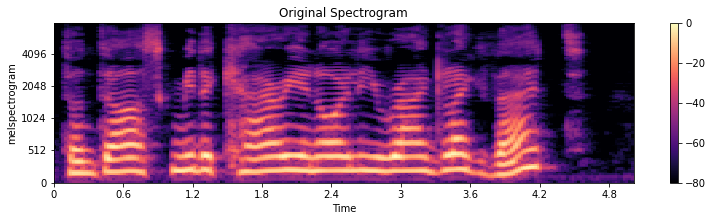

In [7]:
# Source - RAVDESS; Gender - Female; Emotion - Angry 
path = "../input/surrey-audiovisual-expressed-emotion-savee/ALL/DC_su02.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
melspectrogram = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000)


# SpecAugmented MelSpectrogram
plt.figure(figsize=(13,10))
plt.subplot(3,1,1)
librosa.display.specshow(librosa.power_to_db(melspectrogram,ref=np.max),y_axis='mel', fmax=8000, x_axis='time')
plt.ylabel('melspectrogram')
plt.colorbar()
plt.title('Original Spectrogram')

Text(0.5, 1.0, 'SpecAugmented Spectrogram')

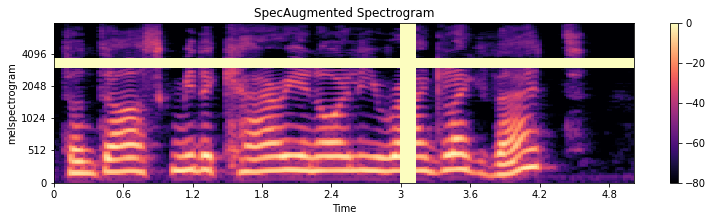

In [15]:
# Source - RAVDESS; Gender - Female; Emotion - Angry 
path = "../input/surrey-audiovisual-expressed-emotion-savee/ALL/DC_su02.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
melspectrogram = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000)


# SpecAugmented MelSpectrogram
plt.figure(figsize=(13,10))
plt.subplot(3,1,1)
librosa.display.specshow((spec_augment(librosa.power_to_db(melspectrogram,ref=np.max))),y_axis='mel', fmax=8000, x_axis='time')
plt.ylabel('melspectrogram')
plt.colorbar()
plt.title('SpecAugmented Spectrogram')